# Nama : Annur Afgoni

# NIM : G1B017006

## osilasi sederhana massa-pegas dengan metode Verlet versi kecepatan.

Dari persamaan Newton, kita dapatkan nilai percepatan pada osilasi pegas:

$$\frac{d^{2}x}{dt^2}=\frac{-k}{m}\Delta x$$

Kita juga bisa mendefinisikan percepatan menjadi turunan dari kecepatan :

$$\frac{dv_x}{dt}=\frac{d^{2}x}{dt^2}=\frac{-k}{m}\Delta x$$

Dengan rumus dari metode verlet versi kecepatan :

$$x_{n+1}=x_n+v_n\Delta t+\frac{1}{2}a_{x,n}(\Delta x)^{2}$$
$$v_{x,n+1}=v_{x,n}+\frac{1}{2}(a_{x,n}+a_{x,n+1})\Delta t$$

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from vpython import *

<IPython.core.display.Javascript object>

In [3]:
#Iterasi metode verlet versi kecepatan

#Notasi :
#xn untuk posisi pada indeks n
#xnp1 untuk posisi pada indeks n+1
#xnm1 untuk posisi pada indeks n-1

import math

#inisiasi parameter

scene = canvas(title='Osilasi Pegas', width=400, height=400, center=vector(0,0,0))

#sun = sphere(pos=vector(0,0,0), radius= 0.3, color=color.yellow)
#sun = sphere(pos=vector(0,0,0), radius= 0.3, color=color.yellow)
planet = sphere(pos=vector(0,0,0), radius= 0.1, color=color.blue) #, make_trail=True)
#tali = cylinder(pos=vector(0,1,0), axis=vector(sin(60*pi/180),-cos(60*pi/180),0), radius=0.01)

#Delta t dalam sekon
dt = 0.05

#posisi awal (m) dan kecepatan awal
x0 = 0.0
vx0 = -10.0

#Nilai awal
xn = x0
vxn = vx0

#array
x = [x0]
vx = [vx0]
t = [0.0]
tn = 0.0

k = 100
m = 0.6

omega = -math.sqrt(k/m)

axn = omega*x0
for i in range (40):
#while (True):   
    #metode verlet versi posisi
    vxnp1 = vxn + 0.5*axn*dt
    xnp1 = xn + vxn*dt + 0.5*axn*dt**2
    
    #Update percepatan
    axn = omega*xn
    vxnp1 = vxnp1 + 0.5*axn*dt
    
    #simpan untuk iterasi selanjutnya
    xn = xnp1
    vxn = vxnp1
    tn = tn + dt
    
    #Simpan hasil pada list
    x.append(xn)
    vx.append(vxn)
    t.append(tn)
    
    rate(20)
    planet.pos = vector(xn, 0, 0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
#Nilai eksak dihitung dengan 
#Persamaan gerak pegas
xe = [x0]
vxe = [vx0]

scene = canvas(title='Osilasi Pegas', width=400, height=400, center=vector(0,0,0))
planet = sphere(pos=vector(0,-1.5,0), radius= 0.1, color=color.blue, make_trail=True)

tn = 0.0

k = 100
m = 0.6

omega = -math.sqrt(k/m)

axn = omega*x0
for i in range (40):
    tn = tn + dt
    
    #persamaan gerak
   
    vxn = vx0 + axn*tn
    xn = x0 + vx0*tn + 0.5*axn*tn**2
    
    axn = omega*xn
    #simpan
    vxe.append(vxn)
    xe.append(xn)
    
    # Not Solved by me the exact solution

<IPython.core.display.Javascript object>

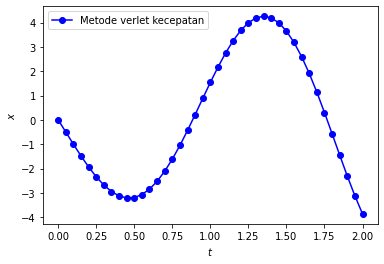

In [5]:
#Visualisasi
plt.plot(t,x,"-ob", label = "Metode verlet kecepatan")
#plt.plot(t,xe,"-r", label = "Eksak")
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.legend()
plt.show()